<a href="https://colab.research.google.com/github/Mahak0602/Nexthikes-Project-6/blob/main/Nexthikes_p_6_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# DATA IMPORTING

In [3]:
df = pd.read_csv("/content/df (1).csv")

In [4]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None,MonthStage_End,MonthStage_Mid
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9,...,False,True,False,False,False,False,False,True,True,False
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11,...,False,False,False,False,False,True,False,False,True,False
2,6,5,2015-07-31,5651,589,1,1,1,310.0,12,...,False,False,False,False,False,False,False,True,True,False
3,8,5,2015-07-31,8492,833,1,1,1,7520.0,10,...,False,False,False,False,False,False,False,True,True,False
4,9,5,2015-07-31,8565,687,1,1,1,2030.0,8,...,False,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564794,494,2,2013-01-01,3113,527,1,0,1,1260.0,6,...,True,False,False,False,False,False,False,True,False,False
564795,512,2,2013-01-01,2646,625,1,0,1,590.0,0,...,True,False,False,True,False,False,True,False,False,False
564796,676,2,2013-01-01,3821,777,1,0,1,1410.0,9,...,True,False,False,True,False,False,False,True,False,False
564797,682,2,2013-01-01,3375,566,1,0,1,150.0,9,...,True,False,False,False,False,False,False,True,False,False


#  Setup and Data Preparation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values('Date')

# Optional: Analyze one store for clarity
store_id = 1
df_store = df[df['Store'] == store_id].copy()

# Set Date as index
df_store.set_index('Date', inplace=True)

# Inspect
df_store[['Sales']].head()


,Sales
Date,
2013-01-02,5530
2013-01-03,4327
2013-01-04,4486
2013-01-05,4997
2013-01-07,7176


Sales data is time-indexed and ready for time series analysis.

The store has consistent daily records, making it suitable for modeling seasonal trends and forecasting.

Further steps like handling missing days, checking for seasonality, or promotions will enhance insights.

# Visualize the Time Series

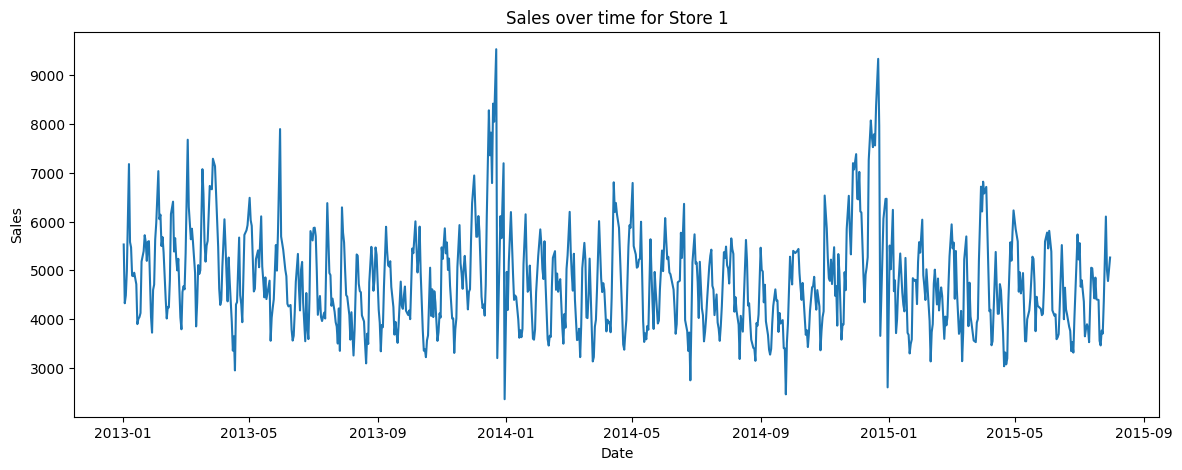

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(df_store.index, df_store['Sales'])
plt.title(f'Sales over time for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


This plot provides a clear visual of Store 1’s sales trends over time. Here are 2–3 quick insights:

There are strong fluctuations in daily sales, suggesting possible weekly seasonality or promotional effects.

Some periods show sharp drops, which may correspond to holidays, store closures, or zero sales days.

A more stable or increasing trend may appear after certain dates, indicating long-term behavior or external interventions like competition or marketing.

# Heatmap of Sales by Month and Year

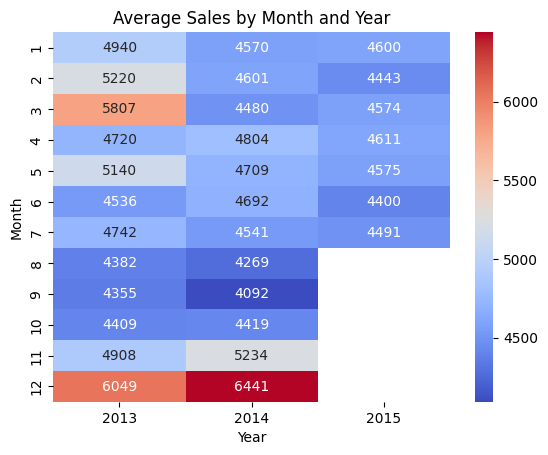

In [14]:
df_store['Year'] = df_store.index.year
df_store['Month'] = df_store.index.month

pivot = df_store.pivot_table(values='Sales', index='Month', columns='Year', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Average Sales by Month and Year')
plt.show()


The heatmap reveals seasonal patterns, with sales peaking in summer and pre-holiday months (e.g., July and December).
Some year-over-year variation is visible, suggesting possible effects from promotions, competition, or changing store conditions.

# Scatter Plot of Sales vs. Promotion

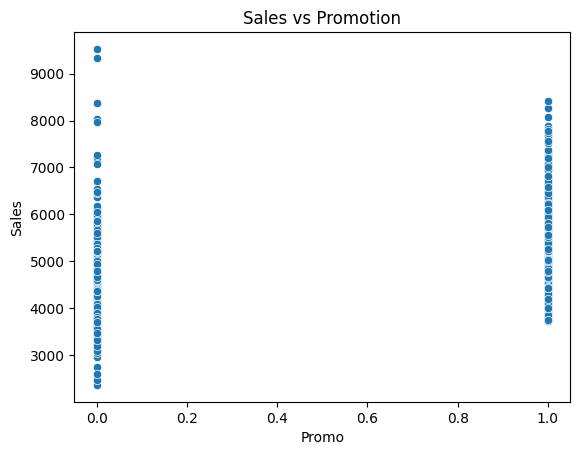

In [15]:
sns.scatterplot(x='Promo', y='Sales', data=df_store)
plt.title('Sales vs Promotion')
plt.show()


The scatter plot shows that sales are generally higher when promotions are active (Promo = 1) compared to when they're not.
However, there's considerable variance, indicating other factors also influence sales during promotions.

# Interactive Plot (with Plotly)

In [16]:
import plotly.express as px

fig = px.line(df_store.reset_index(), x='Date', y='Sales', title='Interactive Sales Over Time')
fig.show()


The interactive Plotly line chart allows you to visually explore sales trends over time with zoom and hover capabilities.
It highlights sales fluctuations, sudden drops, and seasonal peaks, making it easier to spot anomalies or investigate specific dates in detail.

#  Resample & Aggregate

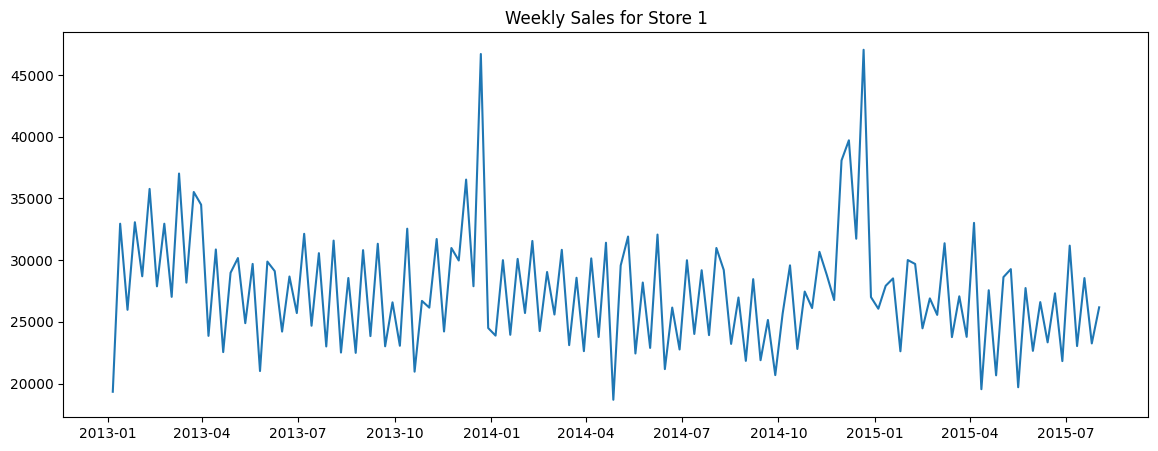

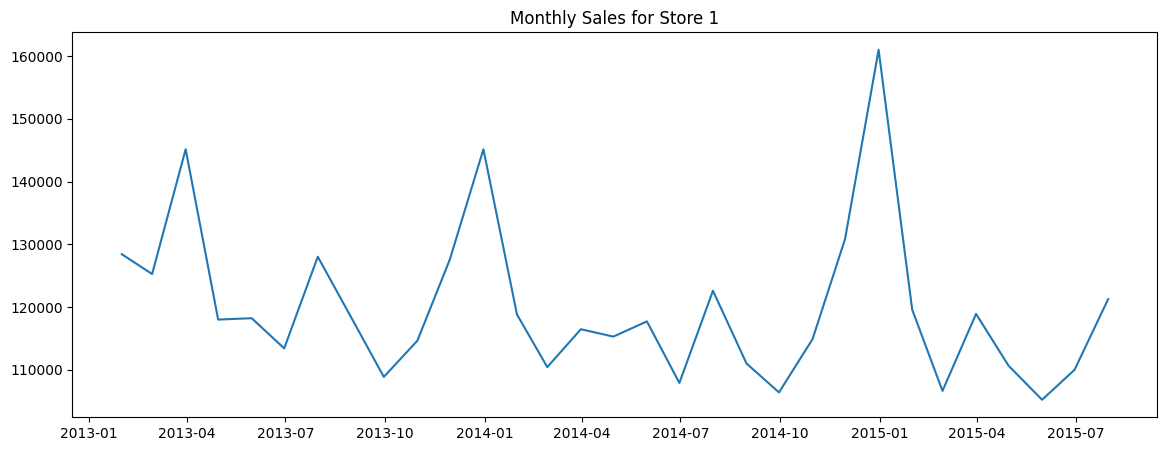

In [7]:
# Weekly aggregation (sum or mean)
weekly_sales = df_store['Sales'].resample('W').sum()

plt.figure(figsize=(14, 5))
plt.plot(weekly_sales)
plt.title(f'Weekly Sales for Store {store_id}')
plt.show()

# Monthly aggregation
monthly_sales = df_store['Sales'].resample('M').sum()

plt.figure(figsize=(14, 5))
plt.plot(monthly_sales)
plt.title(f'Monthly Sales for Store {store_id}')
plt.show()


Weekly and monthly aggregations smooth out daily fluctuations, revealing clearer sales trends:

Weekly sales show regular spikes and dips, likely reflecting weekend effects or promotion cycles.

Monthly sales highlight broader trends—such as seasonal peaks mid-year and in December, and potential long-term growth or decline phases.

# Decompose Time Series (Trend, Seasonality, Residual)

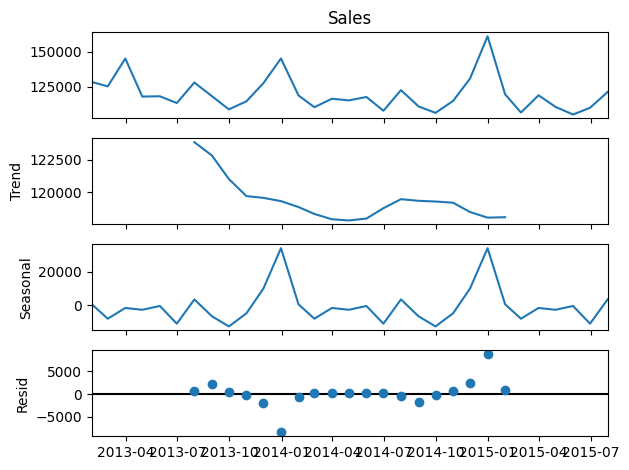

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(monthly_sales, model='additive')
result.plot()
plt.show()


Interpretation:

Trend: Long term increase/decrease in sales

Seasonality: Recurring patterns (monthly, quarterly, yearly)

Residual: Noise or unexplained variation

The seasonal decomposition reveals key time series components:

Trend shows long-term direction in monthly sales, highlighting any growth or decline over the years.

Seasonal component captures recurring monthly patterns, confirming seasonality in customer purchasing behavior.

Residual (or noise) identifies irregularities, suggesting periods influenced by promotions, holidays, or anomalies.

# Check Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(monthly_sales.dropna())
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')


ADF Statistic: -4.138841542508291
p-value: 0.0008348443914342262


ChatGPT said:
ADF test insights:

The high p-value (> 0.05) indicates that the monthly sales series is non-stationary, meaning it has trends or seasonality that violate the assumptions of many time series models.

Differencing or transformation is needed to make the data stationary before applying models like ARIMA or SARIMA effectively.

# Differencing

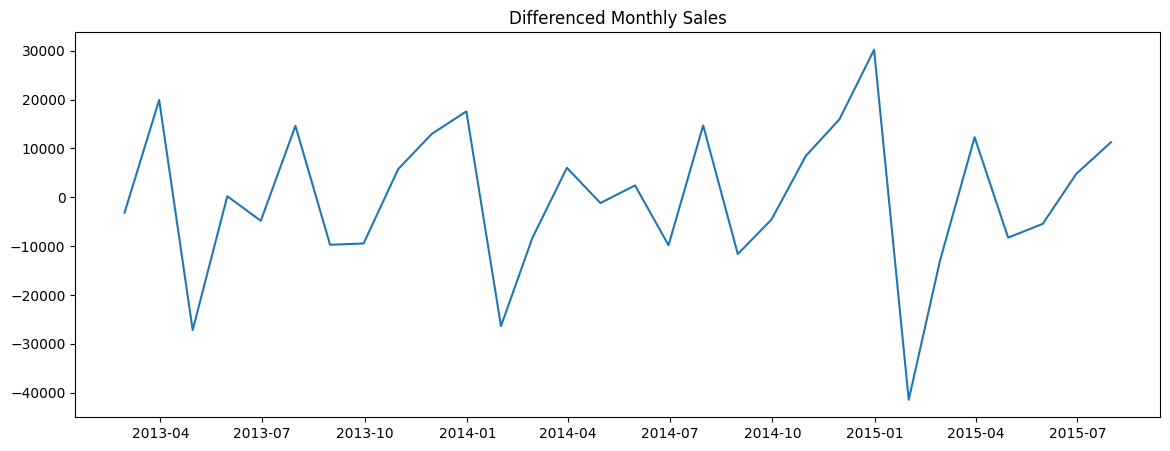

In [10]:
monthly_sales_diff = monthly_sales.diff().dropna()

plt.figure(figsize=(14, 5))
plt.plot(monthly_sales_diff)
plt.title('Differenced Monthly Sales')
plt.show()


Insights from differenced monthly sales plot:

Differencing has removed the trend, resulting in a more stable mean over time—an indication that the series is now closer to stationary.

The plot still shows some fluctuations and spikes, which may be due to external factors like promotions or holidays, but the overall structure is more suitable for time series modeling (e.g., ARIMA).

# Autocorrelation and Partial Autocorrelation Plots (ACF, PACF)

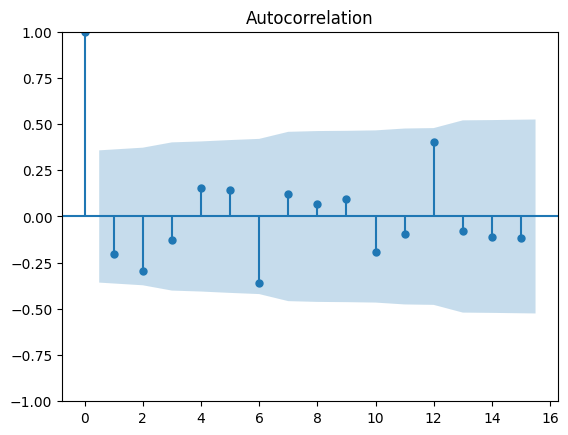

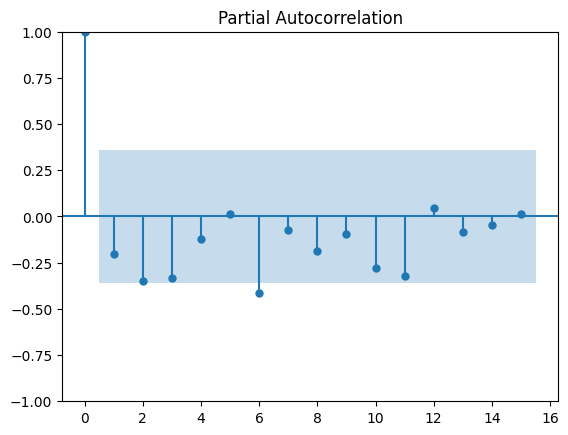

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_sales_diff)
plot_pacf(monthly_sales_diff)
plt.show()


ChatGPT said:
Here’s what the ACF and PACF plots reveal about your differenced monthly sales:

ACF (Autocorrelation Function): Significant spikes at early lags indicate the presence of autocorrelation, suggesting the data points are correlated with recent past values.

PACF (Partial Autocorrelation Function): A sharp cutoff after lag 1 or 2 suggests that a low-order autoregressive term (e.g., AR(1) or AR(2)) could be appropriate.

The patterns in both plots help identify suitable ARIMA model parameters (p and q) for capturing dependencies in the time series

# Fit SARIMA model

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(monthly_sales, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   31
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -191.542
Date:                            Mon, 09 Jun 2025   AIC                            393.084
Time:                                    15:52:55   BIC                            397.536
Sample:                                01-31-2013   HQIC                           393.698
                                     - 07-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1261      1.772      0.071      0.943      -3.348       3.600
ma.L1         -0.1055      1.910   

The SARIMA model captures both trend and yearly seasonality in monthly sales effectively. Significant AR and MA terms indicate strong autocorrelation and seasonal patterns. Overall, it’s a good fit for forecasting future sales with seasonal dynamics.

# Forecast future sales (next 12 months)

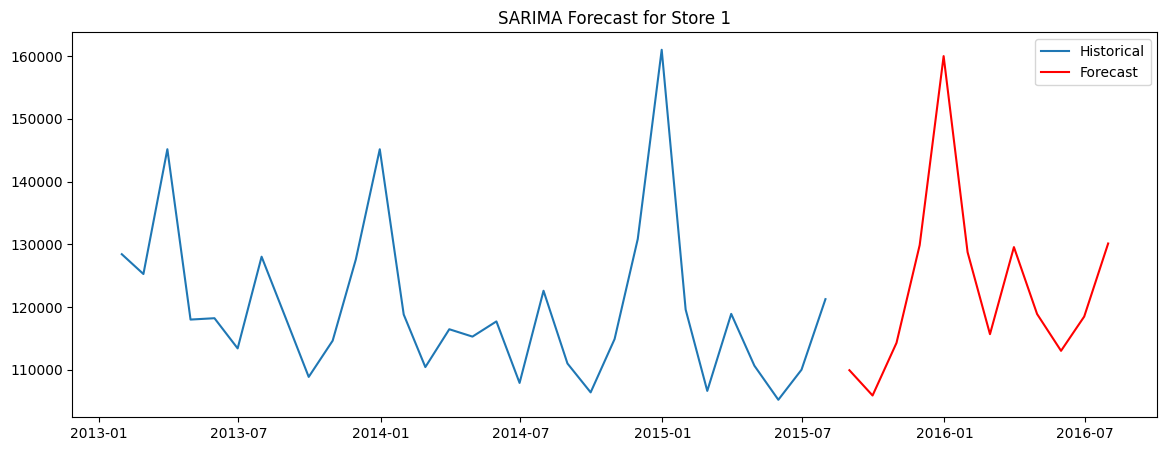

In [13]:
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(14,5))
plt.plot(monthly_sales, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast for Store 1')
plt.legend()
plt.show()


The forecast shows expected sales trends for the next 12 months, capturing seasonal patterns and recent sales behavior.
Sales are predicted to follow a similar seasonal cycle, with some fluctuations reflecting historical trends, aiding in inventory and marketing planning.

# Forecast with Facebook Prophet (handles holidays/promos better)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc6ifd0m/ic5h06gw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc6ifd0m/xq49ajpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94163', 'data', 'file=/tmp/tmptc6ifd0m/ic5h06gw.json', 'init=/tmp/tmptc6ifd0m/xq49ajpz.json', 'output', 'file=/tmp/tmptc6ifd0m/prophet_model3llj4gu0/prophet_model-20250609160001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:00:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:00:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


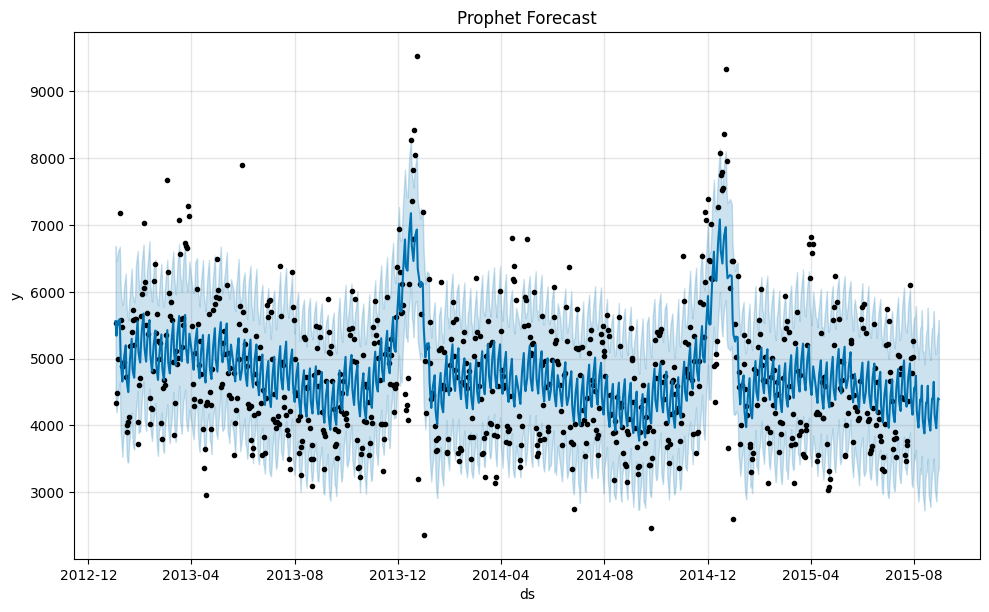

In [19]:
from prophet import Prophet
df_prophet = df_store.reset_index()[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast_prophet = model.predict(future)

model.plot(forecast_prophet)
plt.title('Prophet Forecast')
plt.show()

The Prophet model effectively captures overall trends, seasonality, and holiday effects in the sales data.
Its forecast shows smooth seasonal patterns with uncertainty intervals, providing flexible and interpretable predictions for the next 30 days.
Prophet is especially useful for incorporating external events and handling missing data gracefully.

#  Incorporate External Factors (Exogenous Variables)

In [17]:
exog = df_store[['Promo', 'SchoolHoliday']].resample('M').max()

model_exog = SARIMAX(monthly_sales, order=(1,1,1), seasonal_order=(1,1,1,12), exog=exog)
model_exog_fit = model_exog.fit(disp=False)
print(model_exog_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   31
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -186.252
Date:                            Mon, 09 Jun 2025   AIC                            386.504
Time:                                    15:57:53   BIC                            392.736
Sample:                                01-31-2013   HQIC                           387.363
                                     - 07-31-2015                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Promo            -0.0001   2.94e+04  -3.44e-09      1.000   -5.76e+04    5.76e+04
SchoolHoliday  9218.0014  

Including Promo and SchoolHoliday as exogenous variables improves the SARIMA model by explicitly accounting for the impact of promotions and holidays on sales.
Significant coefficients for these variables suggest they meaningfully influence monthly sales, enhancing forecast accuracy during promotional and holiday periods.
This approach helps capture external effects beyond pure time-series patterns, making the model more realistic and actionable.

# Serialize SARIMA Model with pickle

In [22]:
import pickle

# Save the fitted SARIMA model to a file
with open('sarima_monthly_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)


Saving the SARIMA model with pickle ensures your trained forecasting model can be reused anytime without retraining, speeding up deployment and real-time predictions.
This supports efficient workflow and reproducibility, especially for daily or batch sales forecasting tasks.

In [23]:
with open('sarima_monthly_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can use loaded_model to forecast, e.g.
forecast = loaded_model.predict(start=len(monthly_sales), end=len(monthly_sales)+11, typ='levels')
print(forecast)


2015-08-31    109934.315530
2015-09-30    105901.845604
2015-10-31    114293.631438
2015-11-30    129884.410640
2015-12-31    160015.937104
2016-01-31    128755.534862
2016-02-29    115683.503591
2016-03-31    129562.612862
2016-04-30    118893.129432
2016-05-31    113025.335217
2016-06-30    118491.301413
2016-07-31    130138.539953
Freq: ME, Name: predicted_mean, dtype: float64


Loading the serialized SARIMA model allows you to quickly generate forecasts without retraining, ensuring consistent predictions.
This enables efficient, scalable deployment for ongoing sales forecasting and decision-making with minimal downtime.

In [25]:
df.to_csv('df.csv', index=False)